Option prices for various M values (European call and put):
     M  Call Option Price  Put Option Price
0    1           2.463367          1.816069
1    5           2.183245          1.535947
2   10           2.124835          1.477538
3   20           2.129583          1.482285
4   50           2.127215          1.479917
5  100           2.123667          1.476369
6  200           2.120209          1.472912


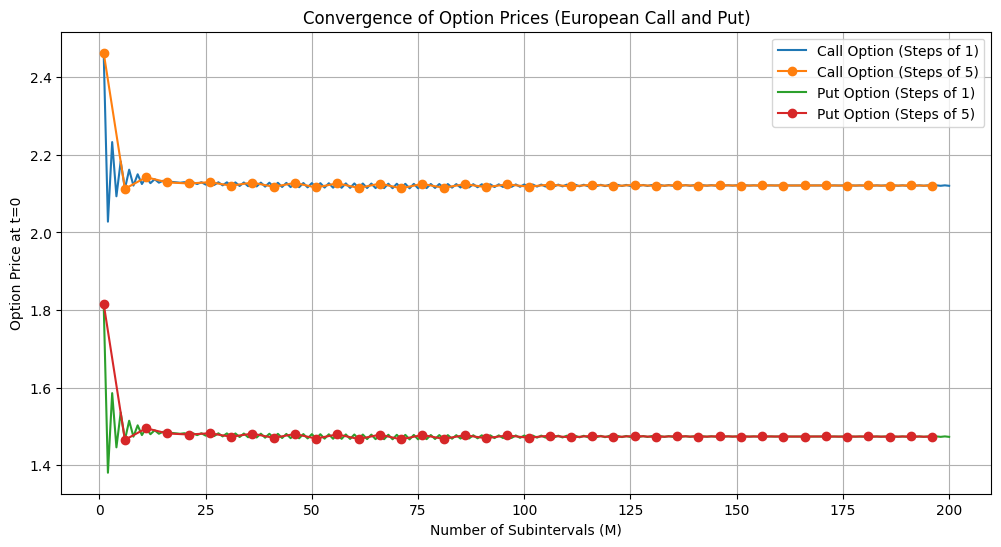

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

s0 = 9
k = 10
t = 3
r = 0.06
sig = 0.3

def power(a, b):
    if b <= 0:
        return 1
    if b % 2 == 1:
        return power(a, (b - 1) / 2) * power(a, (b - 1) / 2) * a
    return power(a, b / 2) * power(a, b / 2)

def binomial_option_price(s0, k, t, r, sig, M, option_type="call"):
    dt = t / M
    option_prices = [0 for _ in range(M + 1)]
    u = np.exp(sig * np.sqrt(dt) + (r - (sig ** 2) / 2) * dt)
    d = np.exp(-sig * np.sqrt(dt) + (r - (sig ** 2) / 2) * dt)
    p = (np.exp(r * dt) - d) / (u - d)
    if not (d < np.exp(r * dt) < u):
        raise ValueError("No-arbitrage condition violated: Ensure d < e^(r*dt) < u")
    for i in range(0, M + 1):
        s = s0 * power(u, M - i) * power(d, i)
        if option_type == "call":
            option_prices[i] = max(0, s - k)
        elif option_type == "put":
            option_prices[i] = max(0, k - s)
        else:
            raise ValueError("Invalid option type. Use 'call' or 'put'.")
    for j in range(M):
        for i in range(M - j):
            option_prices[i] = (p * option_prices[i] + (1 - p) * option_prices[i + 1]) / np.exp(r * dt)
    return option_prices[0]

M_values = [1, 5, 10, 20, 50, 100, 200]
call_prices = [binomial_option_price(s0, k, t, r, sig, m, "call") for m in M_values]
put_prices = [binomial_option_price(s0, k, t, r, sig, m, "put") for m in M_values]

print("Option prices for various M values (European call and put):")
results_A = pd.DataFrame({"M": M_values, "Call Option Price": call_prices, "Put Option Price": put_prices})
print(results_A)

M_steps_1 = list(range(1, 201, 1))
M_steps_5 = list(range(1, 201, 5))

call_prices_steps_1 = [binomial_option_price(s0, k, t, r, sig, m, "call") for m in M_steps_1]
call_prices_steps_5 = [binomial_option_price(s0, k, t, r, sig, m, "call") for m in M_steps_5]

put_prices_steps_1 = [binomial_option_price(s0, k, t, r, sig, m, "put") for m in M_steps_1]
put_prices_steps_5 = [binomial_option_price(s0, k, t, r, sig, m, "put") for m in M_steps_5]

plt.figure(figsize=(12, 6))
plt.plot(M_steps_1, call_prices_steps_1, label="Call Option (Steps of 1)")
plt.plot(M_steps_5, call_prices_steps_5, label="Call Option (Steps of 5)", marker='o')
plt.plot(M_steps_1, put_prices_steps_1, label="Put Option (Steps of 1)")
plt.plot(M_steps_5, put_prices_steps_5, label="Put Option (Steps of 5)", marker='o')
plt.xlabel("Number of Subintervals (M)")
plt.ylabel("Option Price at t=0")
plt.title("Convergence of Option Prices (European Call and Put)")
plt.legend()
plt.grid()
plt.show()


In [10]:
T=3
m = 20
put = []
call = []
dt = T/m
vol = sig*np.sqrt(dt)
mean = (r - 1/2*(sig**2))*dt
d = np.exp(mean - vol)
u = np.exp(mean + vol)
if not(d < np.exp(r*dt) and np.exp(r*dt) < u):
    print("No Arbitrage not satisfied!")
#     BINOMIAL PRICING STARTS HERE
p_tilda = (np.exp(r*dt) - d)/(u - d)
q_tilda = (u - (np.exp(r*dt)))/(u - d)
# #   EUROPEAN CALL
stk = np.zeros((m+1, m+1))
table_call = []
for i in range(m + 1):
    stk[0][i] = max((s0*(d**(i))*(u**(m - i))) - k, 0)
print("Initial E-Call Asset Price at T = 3", stk[0])

for i in range(m):
    i = m - i
    for j in range(i):
        stk[m - i + 1][j] = (p_tilda*stk[m - i][j]+ q_tilda*stk[m - i][j+1])*np.exp(-r*dt)
    if m - i + 1 == 2  or m - i  == 11 or m - i + 1 == 16 or m - i + 1 == 18 or m - i + 1 == 20:
        table_call.append(stk[m-i+1])

# #  EUROPEAN PUT
stk = np.zeros((m+1, m+1))
table_put = []
for i in range(m + 1):
    stk[0][i] = max(k - (s0*(d**(i))*(u**(m - i))), 0)
print("Initial E-Put Asset Price at T = 3", stk[0])

for i in range(m):
    i = m - i
    for j in range(i):
        stk[m - i + 1][j] = (p_tilda*stk[m - i][j]+ q_tilda*stk[m - i][j+1])*np.exp(-r*dt)
    if m - i + 1 == 2  or m - i == 11 or m - i + 1 == 16 or m - i + 1 == 18 or m - i + 1 == 20:
        table_put.append(stk[m-i+1])
table_put = np.array(table_put)
put_dict = {'0': table_put[4][:1], '0.30':table_put[3][:3], '0.75':table_put[2][:6], '1.50':table_put[1][:12], '2.70': table_put[0][:18]}
put_table = pd.DataFrame.from_dict(put_dict, orient='index').transpose()

table_call = np.array(table_call)
call_dict = {'0': table_call[4][:1], '0.30':table_call[3][:3], '0.75':table_call[2][:6], '1.50':table_call[1][:12], '2.70': table_call[0][:18]}
call_table = pd.DataFrame.from_dict(call_dict, orient='index').transpose()

Initial E-Call Asset Price at T = 3 [86.16010715 66.22089093 50.41615787 37.88860491 27.95869451 20.0877942
 13.84895928  8.90377391  4.98399421  1.87699788  0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.        ]
Initial E-Put Asset Price at T = 3 [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.58574926 2.53783507
 4.08514741 5.31161781 6.28377423 7.0543498  7.66514317 8.14928589
 8.5330395  8.83722014 9.0783276 ]


In [11]:
put_table

,0,0.30,0.75,1.50,2.70
0,1.482285,0.823572,0.357207,0.016022,0.000000
1,NaN,1.462989,0.779381,0.076778,0.000000
2,NaN,2.287666,1.438438,0.260116,0.000000
3,NaN,NaN,2.302386,0.668386,0.000000
4,NaN,NaN,3.274137,1.368770,0.000000
5,NaN,NaN,0.000000,2.326885,0.000000
6,NaN,NaN,NaN,3.408201,0.000000
7,NaN,NaN,NaN,4.455041,0.000000
8,NaN,NaN,NaN,5.365082,0.143787
9,NaN,NaN,NaN,0.000000,0.910628


In [12]:
call_table

,0,0.30,0.75,1.50,2.70
0,2.129583,3.724750,6.152495,14.253399,66.057057
1,NaN,1.999168,3.577534,9.500702,50.323286
2,NaN,0.949239,1.860926,5.868680,37.851980
3,NaN,NaN,0.841813,3.252720,27.966654
4,NaN,NaN,0.320964,1.555961,20.131093
5,NaN,NaN,0.000000,0.613991,13.920270
6,NaN,NaN,NaN,0.189214,8.997288
7,NaN,NaN,NaN,0.042255,5.095107
8,NaN,NaN,NaN,0.006036,2.145849
9,NaN,NaN,NaN,0.000000,0.460999
